# Supported Languages

There are [more than 60 Jupyter kernels](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels) that supports most, if not all, scripting languages in use today. SoS Notebook supports all these kernels in the sense that

1. You can use magic `%expand` to pass information from SoS to any subkernel.
2. You can use magic `%capture` to capture output from these kernels.

Actually, most SoS features (e.g. line by line execution) and magics (e.g. `%clear`) work for all subkernels, but magics `%get`, `%put`, and some options for `%use` and `%with` only work with kernels for supported languages. This is because these magics communicate with the subkernels and exchange variables between them, and need to understand the syntax of underlying languages.

SoS defines language modules for an increasing number of languages. This chapter lists the supported languages and demonstrates how variables are exchanged among them. It is worth mentioning that some kernels do not have a concept of variable (e.g. most database kernels that only submit queries and display results), they can be used with SoS Notebook but will never support magic `%get`. 

## Bash <a id="Bash"></a>

The Bash kernel is not rich in data types and everything is essentially a string. You can pass primitive datatypes from SoS to Bash but expect to get string representation of variables out of it.

## JavaScript <a id="JavaScript"></a>

SoS exchange data with a JavaScript kernel using JSON format. It passes all JSON serializable datatypes using the [`json` module](https://docs.python.org/3.6/library/json.html), and convert numpy arrays to list before translation (`array.tolist()`), and use [DataFrame.to_jason](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html) to translate Pandas DataFrame to a list of records in JS.
 
  | Python  |  condition |   JavaScript |
  | --- | --- |---|
  | `None` | |    `null` |
  | `boolean`, `int`, `str`, etc |   | corresponding JS type |
  | `numpy.ndarray` |  |array |
  | `numpy.matrix` |  | nested array |
  | `pandas.DataFrame` |  |  table with scheme and array of records (dictionary) |
  
Translation from JavaScript to Python is easier because Python supports all JSON serializable JS datatypes.

The DataFrame translation is particularly interesting because it allows you to pass complex datatypes in Python and R for visualization. For example, for the following data.frame in R,

In [25]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


It appears in SoS as a pandas DataFrame

In [26]:
%get mtcars --from R
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0
Valiant,18.1,6.0,225.0,105.0,2.76,3.460,20.22,1.0,0.0,3.0,1.0
Duster 360,14.3,8.0,360.0,245.0,3.21,3.570,15.84,0.0,0.0,3.0,4.0
Merc 240D,24.4,4.0,146.7,62.0,3.69,3.190,20.00,1.0,0.0,4.0,2.0
Merc 230,22.8,4.0,140.8,95.0,3.92,3.150,22.90,1.0,0.0,4.0,2.0
Merc 280,19.2,6.0,167.6,123.0,3.92,3.440,18.30,1.0,0.0,4.0,4.0


we can get the data from the JS script kernel as follows:

In [27]:
%get mtcars --from R
mtcars['Mazda RX4']

{ mpg: 21,
  cyl: 6,
  disp: 160,
  hp: 110,
  drat: 3.9,
  wt: 2.62,
  qsec: 16.46,
  vs: 0,
  am: 1,
  gear: 4,
  carb: 4 }

## Julia <a id="Julia"></a>

Julia's data types are pretty close to Python and there is almost a one-to-one correspondence between Julia and Python types. 

When transferring data from Python (SoS) to Julia (e.g. `%get` from Julia), the resulting Julia types are list as follows:

  
  | Python  |  condition |   Julia |
  | --- | --- |---|
  | `None` | |    `NaN` |
  | `boolean` |   | `Bool` |
  | `integer` |  |  `Int64` |
  | `numpy.float64` |  |  `Float64` |
  | `float` |  |  `Float64` |
  | `complex` |  |  `Complex{}` |
  | `str` |  | `String` |
  | Sequence (`list`, `tuple`, ...) |  homogenous type, all integer |  `Array{Int64,1}` |
  | Sequence (`list`, `tuple`, ...) |  homogenous type, all numeric with any float |  `Array{Float64,1}` |
  | Sequence (`list`, `tuple`, ...) |  homogenous type, all str |  `Array{String,1}` |
  | Sequence (`list`, `tuple`, ...) |  multiple types |  `Array{Any,1}` |
  | `set` |  homogenous type, all integer |  `Set{Int64}` |
  | `set` |  homogenous type, all numeric with any float |  `Set{Float64}` |
  | `set` |  homogenous type, all str |  `Set{String}` |
  | `set` |  multiple types |  `Set{Any}` |
  | `dict` |  |`Dict{}`|
  | `numpy.ndarray` |  | `Array{}` |
  | `numpy.matrix` |  | `Array{}` |
  | `pandas.Series` |  | `NamedArrays.NamedArray{}` |
  | `pandas.DataFrame` |  |  `Dataframes.Dataframe{}` |
  Python objects in other datatypes are transferred as string `"Unsupported datatype"`.

It is worth noting that although Julia supports `Char` (single character) and `String` types, SoS always transfer Python `str` to Julia `String`, so if you have a Python string `X`,

In [1]:
sos_var = 'X'

In [2]:
sos_var

"X"

In [3]:
typeof(sos_var)

String

If you need to access the first character as a `Char`, just use

In [4]:
Int(sos_var[1])

88

Conversion of datatypes from Julia to SoS (`%get var --from Julia` from SoS) follows the following rules:

  | Julia  |  condition |   Python |
  | --- | ---| ---|
  | `NaN` |     |  `None` |
  | `Bool` |     |  `boolean` |
  | `Int64` |     |   `integer` |
  | `Char` |     |  `str` |
  | `Complex{}` |     |  `complex` |
  | `Float64` |     |  `numpy.float64` |
  | `String` |     |   `str` |
  | `Array{,1}` |     |   `Sequence (`list`, `tuple`, ...)` |
  | `Set{}` |      | `set` |
  | `Dict{}` |      |  `dict` |
  | `Array{Int64/Float64,2}` |   2 dimensions   |  `numpy.matrix` |
  | `Array{Int64/Float64,}` |   > 2 dimensions   |  `numpy.ndarray` |
  | `NamedArrays.NamedArray` |    1 dimension   |  `pandas.Series` |
  | `Dataframes.Dataframe` |      |  `pandas.DataFrame` |
  Julia objects in other datatypes are transferred as string `"Unsupported datatype"`.

Julia supports DataFrame from its `DataFrames` package so you will need to install this package before using the Julia kernel. For example, a R dataframe is transfered as Dataframes.Dataframe to Julia.

In [5]:
%get mtcars --from R
mtcars

Loading required package: feather
Raw index is ignored because Julia DataFrame does not support raw index.


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,21.0,6.0,160.0,110.0,3.9,2.62,16.46,0.0,1.0,4.0,4.0
2,21.0,6.0,160.0,110.0,3.9,2.875,17.02,0.0,1.0,4.0,4.0
3,22.8,4.0,108.0,93.0,3.85,2.32,18.61,1.0,1.0,4.0,1.0
4,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
5,18.7,8.0,360.0,175.0,3.15,3.44,17.02,0.0,0.0,3.0,2.0
6,18.1,6.0,225.0,105.0,2.76,3.46,20.22,1.0,0.0,3.0,1.0
7,14.3,8.0,360.0,245.0,3.21,3.57,15.84,0.0,0.0,3.0,4.0
8,24.4,4.0,146.7,62.0,3.69,3.19,20.0,1.0,0.0,4.0,2.0
9,22.8,4.0,140.8,95.0,3.92,3.15,22.9,1.0,0.0,4.0,2.0
10,19.2,6.0,167.6,123.0,3.92,3.44,18.3,1.0,0.0,4.0,4.0


As you can see from the warning, row labels of the dataframe is not transferred because Julia's dataframe does not support row label. If you really need the row labels, you would have to assign row labels to a separate variable and transfer.

In [6]:
mpg = mtcars[1]

32-element Array{Float64,1}:
 21.0
 21.0
 22.8
 21.4
 18.7
 18.1
 14.3
 24.4
 22.8
 19.2
 17.8
 16.4
 17.3
  ⋮  
 21.5
 15.5
 15.2
 13.3
 19.2
 27.3
 26.0
 30.4
 15.8
 19.7
 15.0
 21.4

In [7]:
%put mpg

When an Julia `Array` is transferred to SoS (Python3), it becomes a `numpy.array`.

In [9]:
mpg

array([ 21. ,  21. ,  22.8,  21.4,  18.7,  18.1,  14.3,  24.4,  22.8,
        19.2,  17.8,  16.4,  17.3,  15.2,  10.4,  10.4,  14.7,  32.4,
        30.4,  33.9,  21.5,  15.5,  15.2,  13.3,  19.2,  27.3,  26. ,
        30.4,  15.8,  19.7,  15. ,  21.4])

## MATLAB (Octave) <a id="Matlab_Octave"></a>

SoS tries to exchange variables with MATLAB/Octave in the most natural way. For example it converts numpy arrays to MATLAB matrix, and dictionaries to MATLAB struct. It converts Python DataFrame (or R `data.frame`) to `table` in MATLAB but to `dataframe` in Octave because the latter is closer to Python DataFrame.

The convertion of datatype from SoS to MATLAB (Octave) is as followings:
  
  | Python  |  condition |   MATLAB/Octave |
  | --- | --- |---|
  | `None` | |    `NaN` |
  | `boolean` |   | `logical` |
  | `integer` |  |  `integer` |
  | `float` |  |  `float` |
  | `complex` |  |  `complex` |
  | `str` |  | `str` |
  | `char` |  | `char` |
  | Sequence (`list`, `tuple`, ...) |  homogenous type, all numeric |  `vector` |
  | Sequence (`list`, `tuple`, ...) |  homogenous type, all char |  `char` |
  | Sequence (`list`, `tuple`, ...) |  multiple types |  `cell` |
  | `set` |  |  `cell` |
  | `dict` |  |`struct`|
  | `numpy.ndarray` |  | `cell` |
  | `numpy.matrix` |  | `matrix` |
  | `pandas.DataFrame` |  |  `table` (MATLAB) |
  | |  | `dataframe` (Octave) |
  Python objects in other datatypes are transferred as string `"Unsupported datatype"`.

The convertion of datatype from MATLAB (Octave) to SoS is as followings:

  | MATLAB  |  length (n) |   Python |
  | --- | --- |---|
  | `NaN` | |    `None` |
  | `logical` |  `1` |  `boolean` |
  | `integer` |  `1` |  `integer` |
  | `numeric` |  `1` |  `double` |
  | `character` |  `1` |  `string` |
  | `complex` |  `1` |  `complex` |
  | `logical` |  `n > 1` |  `list` |
  | `integer` |  `n > 1` |  `list` |
  | `complex` |  `n > 1` |  `list` |
  | `numeric` |  `n > 1` |  `list` |
  | `character` |  `n > 1` |  `list` |
  | `struct` |  `n > 0` | `numpy.ndarray` |
  | `matrix` |  `n > 0` |  `numpy.array` |
  | `cell` |  `n > 0` |  `numpy.ndarray` |
  | `table` |  `n > 0` |  `pandas.DataFrame` |
  

For example, a R dataframe is transfered as table to MATLAB.

In [3]:
%get mtcars --from R
mtcars


mtcars =

  32�11 table

    mpg     cyl    disp     hp     drat     wt      qsec     vs    am    gear    carb
    ____    ___    _____    ___    ____    _____    _____    __    __    ____    ____

      21    6        160    110     3.9     2.62    16.46    0     1     4       4   
      21    6        160    110     3.9    2.875    17.02    0     1     4       4   
    22.8    4        108     93    3.85     2.32    18.61    1     1     4       1   
    21.4    6        258    110    3.08    3.215    19.44    1     0     3       1   
    18.7    8        360    175    3.15     3.44    17.02    0     0     3       2   
    18.1    6        225    105    2.76     3.46    20.22    1     0     3       1   
    14.3    8        360    245    3.21     3.57    15.84    0     0     3       4   
    24.4    4      146.7     62    3.69     3.19       20    1     0     4       2   
    22.8    4      140.8     95    3.92     3.15     22.9    1     0     4       2   
    19.2    6      167.6   

## Python 2 and Python 3

SoS uses pickle to exchange data between SoS (Python3) and Python2 and Python3 kernels so any pickleable data types can be exchanged.

## R <a id="R"></a>

Because there is no one to one correspondence of data types between Python and R datatypes, SoS tries to translate variables in the most natural way. For example, although `3` and `[1, 4]` are both `numeric` type in R (the former have length 1), they are translated to Python variables `3` (an integer) and `[1, 4]` (a list).

SoS `%put` variables in SoS to R as follows:

  
  | Python  |  condition |   R |
  | --- | --- |---|
  | `None` | |    `NULL` |
  | `boolean` |   | `logical` |
  | `integer` |  |  `integer` |
  | `float` |  |  `numeric` |
  | `complex` |  |  `complex` |
  | `str` |  | `character` |
  | Sequence (`list`, `tuple`, ...) |  homogenous type |  `c()` |
  | Sequence (`list`, `tuple`, ...) |  multiple types |  `list` |
  | `set` |  |  `list` |
  | `dict` |  |  `list` with names |
  | `numpy.ndarray` |  | array |
  | `numpy.matrix` |  | `matrix` |
  | `pandas.DataFrame` |  |  R `data.frame` |

  Python objects in other datatypes are transferred as string `"Unsupported datatype"`.

SoS `%get` data from R as follows:

  
  | R  |  length (n) |   Python |
  | --- | --- |---|
  | `NULL` | |    `None` |
  | `logical` |  `1` |  `boolean` |
  | `integer` |  `1` |  `integer` |
  | `numeric` |  `1` |  `double` |
  | `character` |  `1` |  `string` |
  | `complex` |  `1` |  `complex` |
  | `logical` |  `n > 1` |  `list` |
  | `integer` |  `n > 1` |  `list` |
  | `complex` |  `n > 1` |  `list` |
  | `numeric` |  `n > 1` |  `list` |
  | `character` |  `n > 1` |  `list` |
  | `list` without names |  `n > 0` | `list` |
  | `list` with names |  `n > 0` |  `dict` (with ordered keys)|
  | `matrix` |  `n > 0` |  `numpy.array` |
  | `data.frame` |  `n > 0` |  `DataFrame` |
  | `array` |  `n >= 0` |  `numpy.array` |

For example, the scalar data is converted from SoS to R as follows:

In [1]:
null_var = None
num_var = 123
logic_var = True
char_var = '1"23'
comp_var = 1+2j

In [2]:
%get null_var num_var logic_var char_var comp_var
%preview -n null_var num_var logic_var char_var comp_var

>>> null_var:

NULL

>>> num_var:

[1] 123

>>> logic_var:

[1] TRUE

>>> char_var:

[1] "1\"23"

>>> comp_var:

[1] 1+2i

The one-dimension (vector) data is converted from SoS to R as follows:

In [3]:
import numpy
import pandas
char_arr_var = ['1', '2', '3']
list_var = [1, 2, '3']
dict_var = dict(a=1, b=2, c='3')
set_var = {1, 2, '3'}
recursive_var = {'a': {'b': 123}, 'c': True}
logic_arr_var = [True, False, True]
seri_var = pandas.Series([1,2,3,3,3,3])

In [4]:
%get char_arr_var list_var dict_var set_var recursive_var logic_arr_var seri_var
%preview -n char_arr_var list_var dict_var set_var recursive_var logic_arr_var seri_var

>>> char_arr_var:

[1] "1" "2" "3"

>>> list_var:

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] "3"

>>> dict_var:

$a
[1] 1

$b
[1] 2

$c
[1] "3"

>>> set_var:

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] "3"

>>> recursive_var:

$a
$a$b
[1] 123


$c
[1] TRUE

>>> logic_arr_var:

[1]  TRUE FALSE  TRUE

>>> seri_var:

0 1 2 3 4 5 
1 2 3 3 3 3

The multi-dimension data is converted from SoS to R as follows:

In [5]:
num_arr_var = numpy.array([1, 2, 3, 4]).reshape(2,2)
mat_var = numpy.matrix([[1,2],[3,4]])

In [6]:
%get num_arr_var mat_var
%preview -n num_arr_var mat_var

>>> num_arr_var:

1,2
3,4


>>> mat_var:

0,1
1,2
3,4


The scalar data is converted from R to SoS as follows:

In [7]:
null_var = NULL
num_var = 123
logic_var = TRUE
char_var = '1\"23'
comp_var = 1+2i

In [8]:
%get null_var num_var logic_var char_var comp_var --from R
%preview -n null_var num_var logic_var char_var comp_var

>>> null_var:

None

>>> num_var:

123

>>> logic_var:

True

>>> char_var:

'1"23'

>>> comp_var:

(1+2j)

The one-dimension (vector) data is converted from R to SoS as follows:

In [9]:
num_vector_var = c(1, 2, 3)
logic_vector_var = c(TRUE, FALSE, TRUE)
char_vector_var = c(1, 2, '3')
list_var = list(1, 2, '3')
named_list_var = list(a=1, b=2, c='3')
recursive_var = list(a=1, b=list(c=3, d='whatever'))
seri_var = setNames(c(1,2,3,3,3,3),c(0:5))

In [10]:
%get num_vector_var logic_vector_var char_vector_var list_var named_list_var recursive_var seri_var --from R
%preview -n num_vector_var logic_vector_var char_vector_var list_var named_list_var recursive_var seri_var

>>> num_vector_var:

[1, 2, 3]

>>> logic_vector_var:

[True, False, True]

>>> char_vector_var:

['1', '2', '3']

>>> list_var:

[1, 2, '3']

>>> named_list_var:

{'a': 1, 'b': 2, 'c': '3'}

>>> recursive_var:

{'a': 1, 'b': {'c': 3, 'd': 'whatever'}}

>>> seri_var:

0    1
1    2
2    3
3    3
4    3
5    3
dtype: int64

The multi-dimension data is converted from R to SoS as follows:

In [11]:
mat_var = matrix(c(1,2,3,4), nrow=2)
arr_var = array(c(1:16),dim=c(2,2,2,2))

In [12]:
%get mat_var arr_var --from R
%preview -n mat_var arr_var

>>> mat_var:

array([[ 1.,  3.],
       [ 2.,  4.]])

>>> arr_var:

array([[[[ 1,  3],
         [ 2,  4]],

        [[ 5,  7],
         [ 6,  8]]],


       [[[ 9, 11],
         [10, 12]],

        [[13, 15],
         [14, 16]]]])

It is worth noting that R's named `list` is transferred to Python as dictionaries but SoS preserves the order of the keys so that you can recover the order of the list. For example,

In [13]:
Rlist = list(A=1, C='C', B=3, D=c(2, 3))

Although the dictionary might appear to have different order

In [14]:
%get Rlist --from R
Rlist

{'A': 1, 'B': 3, 'C': 'C', 'D': [2, 3]}

The order of the keys and values are actually preserved

In [15]:
Rlist.keys()

dict_keys(['A', 'C', 'B', 'D'])

In [16]:
Rlist.values()

dict_values([1, 'C', 3, [2, 3]])

so it is safe to enumerate the R list in Python as

In [17]:
for idx, (key, val) in enumerate(Rlist.items()):
  print(f"{idx+1} item of Rlist has key {key} and value {val}")

1 item of Rlist has key A and value 1
2 item of Rlist has key C and value C
3 item of Rlist has key B and value 3
4 item of Rlist has key D and value [2, 3]


Note that SoS uses the feather modules in Python and R to exchange Python Pandas `Dataframe` and R `data.frame` so this module is required if you would like to exchange data frames between these two languages.

## Ruby 

Basic data types recognised in Ruby are similar with Python's data types and there is a one-to-one correspondence for these types.

The convertion of datatype from SoS to Ruby (e.g. `%get` from Ruby) is as followings:

  
  | Python  |  condition |   Ruby |
  | --- | --- |---|
  | `None` | |    `nil` |
  | `boolean` |   | `TrueClass or FalseClass` |
  | `integer` |  |  `Integer` |
  | `float` |  |  `Float` |
  | `complex` |  |  `Complex` |
  | `str` |  | `String` |
  | Sequence (`list`, `tuple`, ...) |  |  `Array` |
  | `set` |  |  `Set` |
  | `dict` |  |  `Hash` |
  | `range` |  |  `Range` |
  | `numpy.ndarray` |  | `Array` |
  | `numpy.matrix` |  | `NMatrix` |
  | `pandas.Series` |  | `Hash` |
  | `pandas.DataFrame` |  | `Daru::DataFrame` |

  Python objects in other datatypes are transferred as string `"Unsupported datatype"`. Please [let us know](https://github.com/vatlab/sos-ruby/issues) if there is a natural corresponding data type in Ruby to convert this data type.

Conversion of datatypes from Ruby to SoS (`%get var --from Ruby` from SoS) follows the following rules:

  | Ruby  |  condition |   Python |
  | --- | ---| ---|
  | `nil` |     |  `None` |
  | `Float::NAN` |     |  `numpy.nan` |
  | `TrueClass or FalseClass` |     |  `boolean` |
  | `Integer` |     |   `integer` |
  | `String` |     |  `str` |
  | `Complex` |     |  `complex` |
  | `Float` |     |  `float` |
  | `Array` |     |   `numpy.ndarray` |
  | `Range` |     |   `range` |
  | `Set` |      | `set` |
  | `Hash` |      |  `dict` |
  | `NMatrix` |   |  `numpy.matrix` |
  | `Array` |   |  `numpy.ndarray` |
  | `Daru::DataFrame` |      |  `pandas.DataFrame` |
  Ruby objects in other datatypes are transferred as string `"Unsupported datatype"`. 

For example, the scalar data is converted from SoS to Ruby as follows:

In [1]:
null_var = None
num_var = 123
logic_var = True
char_var = '1"23'
comp_var = 1+2j

In [2]:
%get null_var num_var logic_var char_var comp_var
puts [null_var, num_var, logic_var, char_var, comp_var]

[nil, 123, true, "1\"23", (1.0+2.0i)]


Ruby supports DataFrame from its daru (Data Analysis in RUby) library so you will need to install this library before using the Ruby kernel. For example, a R dataframe is transfered as Daru::DataFrame to Ruby.

In [3]:
%get mtcars --from R
mtcars

Loading required package: feather


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110.0,3.9,2.62,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.9,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,22.8,4.0,108.0,93.0,3.85,2.32,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.44,17.02,0.0,0.0,3.0,2.0
Valiant,18.1,6.0,225.0,105.0,2.76,3.46,20.22,1.0,0.0,3.0,1.0
Duster 360,14.3,8.0,360.0,245.0,3.21,3.57,15.84,0.0,0.0,3.0,4.0
Merc 240D,24.4,4.0,146.7,62.0,3.69,3.19,20.0,1.0,0.0,4.0,2.0
Merc 230,22.8,4.0,140.8,95.0,3.92,3.15,22.9,1.0,0.0,4.0,2.0
Merc 280,19.2,6.0,167.6,123.0,3.92,3.44,18.3,1.0,0.0,4.0,4.0


Also, we choose NMatrix library in Ruby becuase its fast performance. Same as daru (Data Analysis in RUby), you will need to install nmatrix library before using the Ruby kernel.

In [4]:
mat_var = N[ [2, 3, 4], [7, 8, 9] ]

#<NMatrix:0x00007fd374374ca0 shape:[2,3] dtype:int32 stype:dense>

In [5]:
%put mat_var

'numpy.matrix([[2, 3, 4], [7, 8, 9]])'


In [6]:
mat_var

matrix([[2, 3, 4],
        [7, 8, 9]])

## SAS <a id="SAS"></a>

A SAS dataset is roughly equivalent to Python's DataFrame (Pandas) and R's dataframe, and this is the only datatype that can be exchanged between SAS and other languages.

For example, you can get a R dataframe into SAS as follows:

In [1]:
%get mtcars --from R
PROC PRINT;
RUN;

Loading required package: feather


And if you have a SAS dataset,

In [2]:
DATA CLASS;
     INPUT NAME $ 1-8 SEX $ 10 AGE 12-13 HEIGHT 15-16 WEIGHT 18-22;
CARDS;
JOHN     M 12 59 99.5
JAMES    M 12 57 83.0
ALFRED   M 14 69 112.5
ALICE    F 13 56 84.0
PROC PRINT;
RUN;

You can transfer the dataset to Python or R and analyze there

In [3]:
%get CLASS --from SAS
%preview -n CLASS

%preview CLASS

>>> CLASS:

,NAME,SEX,AGE,HEIGHT,WEIGHT
0,JOHN,M,12.0,59.0,99.5
1,JAMES,M,12.0,57.0,83.0
2,ALFRED,M,14.0,69.0,112.5
3,ALICE,F,13.0,56.0,84.0


## Stata <a id="Stata"></a>

Stata, similar to SAS, has one and only one unnamed "current dataset" in memory so it can only exchange this default dataset with other kernels as follows:

1. Stata can only `put` and `get` data in type `DataFrame` or its equivalences.
2. When Stata `%get` a dataframe, it replaces the current dataset with the new one.
3. When Stata `%put var --to kernel`, it creates a `DataFrame` in `kernel` with name `var`.

For example, let us start a Stata session and load a dataset from a local file:

In [1]:
cd ~/Downloads/StataIntro/dataSets
use gss.dta
ds


/Users/bpeng1/Downloads/StataIntro/dataSets


marital  age      educ     sex      inc      happy    region


The dataset can be sent to another kernel in any name:

In [2]:
%get mydata --from Stata
mydata

,marital,age,educ,sex,inc,happy,region
0,divorced,54,15,male,$50000 to 59999,pretty happy,north
1,married,34,12,female,$17500 to 19999,pretty happy,north
2,never married,26,19,male,$6 000 to 6 999,pretty happy,north
3,never married,21,15,female,$3 000 to 3 999,very happy,north
4,married,53,18,male,$35000 to 39999,pretty happy,north
5,never married,27,16,male,$30000 to 34999,pretty happy,north
6,never married,22,15,male,$17500 to 19999,very happy,north
7,never married,29,10,female,$7 000 to 7 999,pretty happy,north
8,married,30,11,female,under $1 000,pretty happy,north
9,never married,23,16,male,$35000 to 39999,pretty happy,north


If we get a data set from another kernel, the current dataset of Stata will be replaced with the new content:

In [3]:
%get mtcars --from R
ds

Loading required package: feather


index  mpg    cyl    disp   hp     drat   wt     qsec   vs     am     gear   carb


(bin=5, start=1.513, width=.7822)


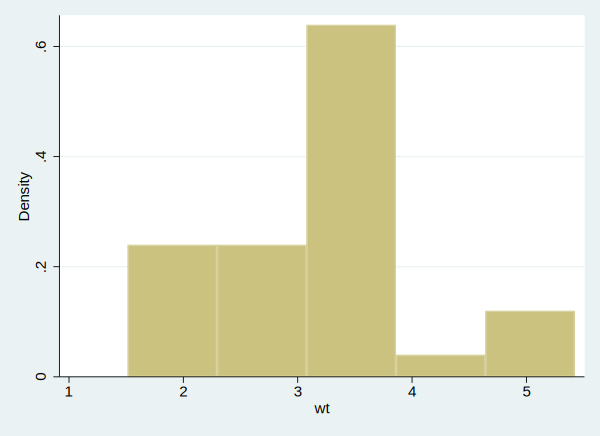

In [4]:
hist(wt)

The `%sessioninfo` magic lists the version of Stata when the `stata` kernel is used:

In [5]:
%sessioninfo

SoS 
 
 
 SoS Version 0.17.7 
 
 
 Stata 
 
 
 Kernel stata 
 
 
 Language Stata 
 
 
 version 15.1
 
 
 
 Python3 
 
 
 Kernel python3 
 
 
 Language Python3 
 
 
 Version 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:07:29) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] 
 
 
 R 
 
 
 Kernel ir 
 
 
 Language R 
 
 
 R version 3.5.0 (2018-04-23)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS High Sierra 10.13.6

Matrix products: default
BLAS/LAPACK: /Users/bpeng1/anaconda3/envs/sos/lib/libopenblasp-r0.2.20.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats graphics grDevices utils datasets methods base 

other attached packages:
[1] feather_0.3.1

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.16 digest_0.6.15 crayon_1.3.4 IRdisplay_0.4.4
 [5] repr_0.13 jsonlite_1.5 magrittr_1.5 evaluate_0.10.1
 [9] pillar_1.2.1 rlang_0.2.0 stringi_1.1.7 uuid_0.1-2 
[13] IRkernel_0.8.11 tools_3.5.0 stringr_1.3.0 hms_0.4.2 
[17] compiler_3.5.0 pkgconfig_2.0.1 base64enc_0.1-3 htmltools_0.3.6
[21] pbdZMQ_0.3-2 tibble_1.4.2

## TypeScript <a id="TypeScript"></a>

SoS exchange data with a JypeScript kernel using JSON format. It passes all JSON serializable datatypes using the [`json` module](https://docs.python.org/3.6/library/json.html), and convert numpy arrays to list before translation (`array.tolist()`), and use [DataFrame.to_jason](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html) to translate Pandas DataFrame to a list of records in JS.
 
  | Python  |  condition |   TypeScript |
  | --- | --- |---|
  | `None` | |    `null` |
  | `boolean`, `int`, `str`, etc |   | corresponding JS type |
  | `numpy.ndarray` |  |array |
  | `numpy.matrix` |  | nested array |
  | `pandas.DataFrame` |  |  table with scheme and array of records (dictionary) |
  
Translation from TypeScript to Python is easier because Python supports all JSON serializable TS datatypes.

The DataFrame translation is particularly interesting because it allows you to pass complex datatypes in Python and R for visualization. For example, for the following data.frame in R,

In [1]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


we can get the data from the TS script kernel as follows:

In [3]:
%get mtcars --from R
mtcars['Mazda RX4']

{ mpg: 21,
  cyl: 6,
  disp: 160,
  hp: 110,
  drat: 3.9,
  wt: 2.62,
  qsec: 16.46,
  vs: 0,
  am: 1,
  gear: 4,
  carb: 4 }